In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from implementations import *
from GAN_function import *

## Train all models

In [5]:
# THE PARAMETERS

data_path = data_file(20.0
                     )
g_lr = 1e-4  # @param {type:"number",  min:0.000001}
# Learning rate of the discriminator:
d_lr = 5e-4  # @param {type:"number",  min:0.000001}
# batch size:
batch_size = 64  # @param {type:"integer",  min:1}
# dimension of tha latent vector
noise_dim = 100  # @param {type:"integer",  min:1}
# number of training iterations
total_iterations = 5000  # @param {type:"slider", min:1, max:50000, step:1}

criterion = nn.BCELoss()  # Binary cross entropy

### GAN1

In [36]:
dim_out=2
g_model1 = GeneratorMLP(dim_hidden=128, dim_out=dim_out, noise_dim=noise_dim)
d_model1 = DiscriminatorMLP(dim_hidden=128, dim_gen_out=dim_out)
print(g_model1)
print(d_model1)

GeneratorMLP(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)
DiscriminatorMLP(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [37]:
data1, data2 = GAN1_data(data_path)

In [38]:
g_model1 = train_GAN(g_lr=g_lr, d_lr=d_lr, batch_size=batch_size, noise_dim=noise_dim,\
                          total_iterations=total_iterations, criterion=criterion, data=data1,\
                          g_model=g_model1, d_model=d_model1)

In [39]:
# Save the entire model as a SavedModel.
torch.save(g_model1.state_dict(), 'saved_model/model1')

In [41]:
gmodel_1 = GeneratorMLP(dim_hidden=128, dim_out=dim_out, noise_dim=noise_dim)
gmodel_1.load_state_dict(torch.load('saved_model/model1'))
gmodel_1.eval()

GeneratorMLP(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)

### GAN2

In [42]:
dim_out=2
g_model2 = GeneratorMLP(dim_hidden=128, dim_out=dim_out, noise_dim=noise_dim)
d_model2 = DiscriminatorMLP(dim_hidden=128, dim_gen_out=dim_out)
print(g_model2)
print(d_model2)

GeneratorMLP(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)
DiscriminatorMLP(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [43]:
g_model2 = train_GAN(g_lr=g_lr, d_lr=d_lr, batch_size=batch_size, noise_dim=noise_dim,\
                          total_iterations=total_iterations, criterion=criterion, data=data2,\
                          g_model=g_model2, d_model=d_model2)

In [44]:
# Save the entire model as a SavedModel.
torch.save(g_model2.state_dict(), 'saved_model/model2')

In [45]:
gmodel_2 = GeneratorMLP(dim_hidden=128, dim_out=dim_out, noise_dim=noise_dim)
gmodel_2.load_state_dict(torch.load('saved_model/model2'))
gmodel_2.eval()

GeneratorMLP(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)

### GAN3

In [46]:
dim_out=5
g_model3 = GeneratorMLP(dim_hidden=128, dim_out=dim_out, noise_dim=noise_dim)
d_model3 = DiscriminatorMLP(dim_hidden=128, dim_gen_out=dim_out)
print(g_model3)
print(d_model3)

GeneratorMLP(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=5, bias=True)
  )
)
DiscriminatorMLP(
  (net): Sequential(
    (0): Linear(in_features=5, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [47]:
data3, data4 = GAN2_data(data_path)

In [48]:
g_model3 = train_GAN(g_lr=g_lr, d_lr=d_lr, batch_size=batch_size, noise_dim=noise_dim,\
                          total_iterations=total_iterations, criterion=criterion, data=data3,\
                          g_model=g_model3, d_model=d_model3)

In [49]:
# Save the entire model as a SavedModel.
torch.save(g_model3.state_dict(), 'saved_model/model3')

In [50]:
gmodel_3 = GeneratorMLP(dim_hidden=128, dim_out=dim_out, noise_dim=noise_dim)
gmodel_3.load_state_dict(torch.load('saved_model/model3'))
gmodel_3.eval()

GeneratorMLP(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=5, bias=True)
  )
)

### GAN4

In [51]:
dim_out=5
g_model4 = GeneratorMLP(dim_hidden=128, dim_out=dim_out, noise_dim=noise_dim)
d_model4 = DiscriminatorMLP(dim_hidden=128, dim_gen_out=dim_out)
print(g_model4)
print(d_model4)

GeneratorMLP(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=5, bias=True)
  )
)
DiscriminatorMLP(
  (net): Sequential(
    (0): Linear(in_features=5, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [52]:
g_model4 = train_GAN(g_lr=g_lr, d_lr=d_lr, batch_size=batch_size, noise_dim=noise_dim,\
                          total_iterations=total_iterations, criterion=criterion, data=data4,\
                          g_model=g_model4, d_model=d_model4)

In [53]:
# Save the entire model as a SavedModel.
torch.save(g_model4.state_dict(), 'saved_model/model4')

In [54]:
gmodel_4 = GeneratorMLP(dim_hidden=128, dim_out=dim_out, noise_dim=noise_dim)
gmodel_4.load_state_dict(torch.load('saved_model/model4'))
gmodel_4.eval()

GeneratorMLP(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=5, bias=True)
  )
)

### GAN5

In [55]:
dim_out=5
g_model5 = GeneratorMLP(dim_hidden=128, dim_out=dim_out, noise_dim=noise_dim)
d_model5 = DiscriminatorMLP(dim_hidden=128, dim_gen_out=dim_out)
print(g_model5)
print(d_model5)

GeneratorMLP(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=5, bias=True)
  )
)
DiscriminatorMLP(
  (net): Sequential(
    (0): Linear(in_features=5, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [56]:
data5, data6 = GAN3_data(data_path)

In [57]:
g_model5 = train_GAN(g_lr=g_lr, d_lr=d_lr, batch_size=batch_size, noise_dim=noise_dim,\
                          total_iterations=total_iterations, criterion=criterion, data=data5,\
                          g_model=g_model5, d_model=d_model5)

In [58]:
# Save the entire model as a SavedModel.
torch.save(g_model5.state_dict(), 'saved_model/model5')

In [59]:
gmodel_5 = GeneratorMLP(dim_hidden=128, dim_out=dim_out, noise_dim=noise_dim)
gmodel_5.load_state_dict(torch.load('saved_model/model5'))
gmodel_5.eval()

GeneratorMLP(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=5, bias=True)
  )
)

### GAN6

In [60]:
dim_out=5
g_model6 = GeneratorMLP(dim_hidden=128, dim_out=dim_out, noise_dim=noise_dim)
d_model6 = DiscriminatorMLP(dim_hidden=128, dim_gen_out=dim_out)
print(g_model6)
print(d_model6)

GeneratorMLP(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=5, bias=True)
  )
)
DiscriminatorMLP(
  (net): Sequential(
    (0): Linear(in_features=5, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [61]:
g_model6 = train_GAN(g_lr=g_lr, d_lr=d_lr, batch_size=batch_size, noise_dim=noise_dim,\
                          total_iterations=total_iterations, criterion=criterion, data=data6,\
                          g_model=g_model6, d_model=d_model6)

In [62]:
# Save the entire model as a SavedModel.
torch.save(g_model6.state_dict(), 'saved_model/model6')

In [63]:
gmodel_6 = GeneratorMLP(dim_hidden=128, dim_out=dim_out, noise_dim=noise_dim)
gmodel_6.load_state_dict(torch.load('saved_model/model6'))
gmodel_6.eval()

GeneratorMLP(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Linear(in_features=128, out_features=5, bias=True)
  )
)

## TEST

In [21]:
import numpy as np, queue, pylab as plt, random, sys, enum, math

class Type(enum.Enum):
    photon = 0; electron = 1; positron = 2; proton = 4; nuetron = 5

class Arena :
    def __init__(self, wx:float, wy:float, wz:float, nx:int, ny:int, nz:int) :
        self.M = np.zeros((nx, ny, nz))
        self.voxel = np.array((wx/nx, wy/ny, wz/nz))
    def Deposit(self, pos, ene:float) :
        idx = (pos/self.voxel).astype(int)
        try :
            self.M[idx[0],idx[1],idx[2]] += ene
        except :
            return False # if a deposit fails, it means we're out of the arena
        return True



In [22]:
class Particle :
    def __init__(self, x:float, y:float, z:float, dx:float, dy:float, dz:float, e:float, t:Type, is_primary:bool=False) :
        self.pos = np.array((x, y, z), dtype=float)
        self.dir = np.array((dx, dy, dz), dtype=float)
        self.ene = e
        self.type = t
        self.is_primary = is_primary

    def Lose(self, energy:float, phantom:Arena) :
        energy = min(energy, self.ene) # lose this much energy and deposit it in the arena
        self.ene -= energy
        if not phantom.Deposit(self.pos, energy) :
            self.ene = 0.0 # if a deposit fails, it means we're out of the arena, so kill the particle

    def Move(self, distance:float) :
        self.pos += distance*self.dir

    def Rotate(self, cos_angle:float) :
        s = cos_angle * random.random() # approximate version
        self.dir[1] += s
        self.dir[2] += (cos_angle - s)
        self.dir /= np.linalg.norm(self.dir)

In [23]:

def CoreEvent(max_dist:float, max_dele:float, max_cos:float, prob:float) :
    s = random.random() # simple event generator for testing
    distance = max_dist*s
    delta_e = max_dele*s
    cos_theta = max_cos*(random.random() - 0.5)
    if s > prob :
        delta_e *= 0.5
        Q = Particle(P.pos[0], P.pos[1], P.pos[2], P.dir[0], P.dir[1], P.dir[2], delta_e, Type.electron)
        Q.Rotate(0.5)
        return distance, delta_e, cos_theta, Q
    else :        
        return distance, delta_e, cos_theta, None



In [24]:
def GetEvent(P:Particle) :
    """this is the function you are responsible for creating, given a particle it returns:
    distance:	distance the particle travels before having this event
    delta_e:	amount of energy that the particle loses during this event
    cos_theta:	cosine of the angle that the particle rotates by
    Q:		a particle generated during this event, or None
    """
    if P.type == Type.photon :
        return CoreEvent(5.0, 0.5, 0.05, 0.99)
    elif P.type == Type.electron :
        return CoreEvent(1.0, 0.2, 0.1, 0.75)

Finished     9999 out of    10000 99.99 %
Finished with    10000 primaries and a total of  1365415 particles


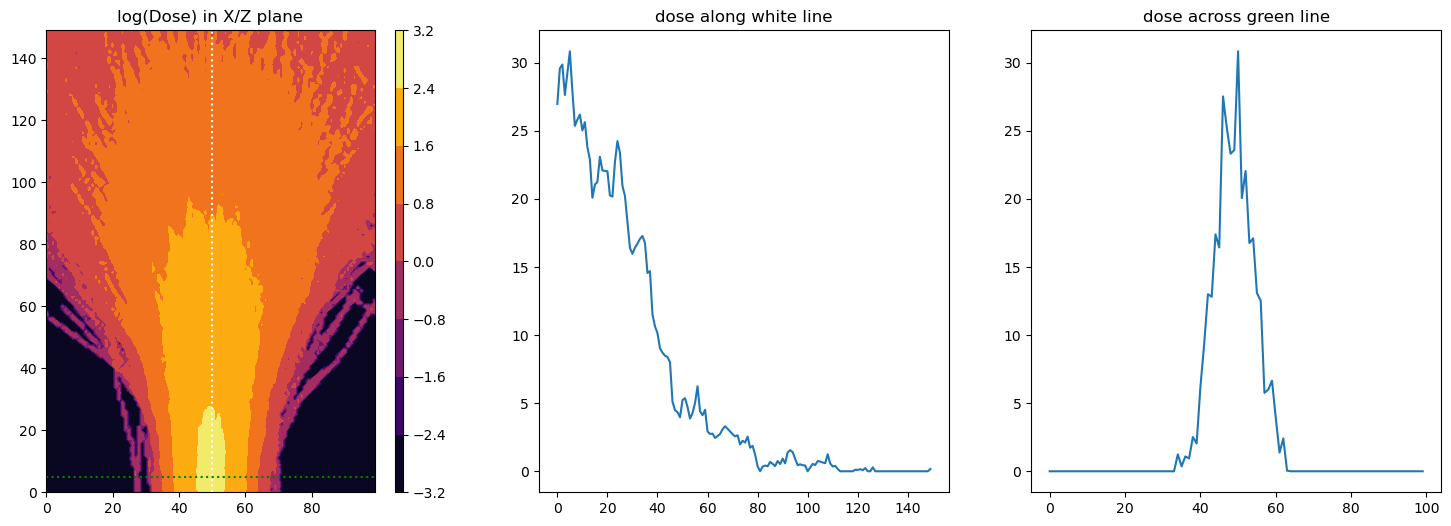

In [26]:



WX,WY,WZ = 300,200,200 # 300x200x200 mm
NX,NY,NZ = 150,100,100 # for 2x2x2 mm voxels
A = Arena(WX, WY, WZ, NX, NY, NZ)
NMC = 10000 # number of particles we want to simulate
EMAX = 20.0 # maximum energy of particles

ToSimulate = queue.Queue() # the queue of particles
for i in range(NMC) :
    # create NMC particles at x=0, y=WY/2, z=WZ/2, going in the X direction (1,0,0) and with a gamma distributed energy
    s = random.gauss(0.0, 0.1)
    ypos = (1+s)*WY/2
    ydir = 0.2*s
    s = random.gauss(0.0, 0.1)
    zpos = (1+s)*WZ/2
    zdir = 0.2*s
    xdir = math.sqrt(1 - ydir**2 - zdir**2)
    e = EMAX*random.gammavariate(2.0, 0.667)
    P = Particle(0.0, ypos, zpos, xdir, ydir, zdir, e, Type.electron, True)
    ToSimulate.put(P)

DONE = 0 # count number of primary particles
NALL = 0 # count total number of particles
while not ToSimulate.empty() > 0 :
    P = ToSimulate.get()
    if P.is_primary :
        DONE += 1
    NALL += 1
    while P.ene > 0.0 :
        distance, delta_e, cos_theta, generated_particle = GetEvent(P)
        P.Move(distance)
        P.Lose(delta_e, A)
        P.Rotate(cos_theta)
        if generated_particle is not None :
            ToSimulate.put(generated_particle)
    if DONE % 1000 :
        sys.stdout.write(f"Finished {DONE:8} out of {NMC:8} {(100.0*DONE)/NMC:.2f} %\r"); sys.stdout.flush()
sys.stdout.write(f"\nFinished with {NMC:8} primaries and a total of {NALL:8} particles\n"); sys.stdout.flush()

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
CNTR = axes[0].contourf( np.log10(A.M.sum(axis=1)+0.001), cmap="inferno" )
axes[0].axvline(NY/2, ls=":", color="white")
axes[0].axhline(5, ls=":", color="green")
plt.colorbar(CNTR, aspect=60)
axes[0].set_title("log(Dose) in X/Z plane")
axes[1].plot( A.M[:,int(NY/2),int(NZ/2)] )
axes[1].set_title("dose along white line")
axes[2].plot( A.M[5,:,int(NZ/2)] )
axes[2].set_title("dose across green line")
plt.show()



In [ ]:
def GetEvent_Model(P:Particle, table_of_p):
    # Compute probability of particles
    table = table_of_p.copy(deep=True)
    KinE = P.ene
    prob_all = table.loc[(table['Energy_min'] <  KinE) & (table['Energy_max'] >= KinE)]
    prob0, prob1 = prob_all[['proba_0', 'proba_1']].values
    s = random.random() # simple event generator for testing
    if s <= prob0:
        name_s = 0
    elif ((s > prob0) & (s < prob0 + prob1)):
        name_s = 1
    else:
        name_s = 2
    
    # Now we have the type of the particle
    # Let's find the model necessary for the particle
    
    model = get_model(KinE=KinE, name_s=name_s)
    
    if name_s!=0:
        if (name_s == 1):
            name_s = Type.electron
        else:
            name_s = Type.photon
        Q = Particle(P.pos[0], P.pos[1], P.pos[2], DX_Q, DY_Q, DZ_Q, delta_e, name_s)
        Q.Rotate(0.5)
        return distance, delta_e, cos_theta, Q
    

In [28]:
a = 1
if a != None:
    print(a)

1
